In [20]:
!pip install torch torchvision timm \
    segmentation-models-pytorch==0.3.0 \
    albumentations opencv-python pillow numpy scikit-learn matplotlib \
    fastapi uvicorn python-multipart aiofiles


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 12.4 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16426 sha256=ad25143d3353f71a08525c565589784a83811fade5e6b0f2c272752fa6762767
  Stored in directory: /root/.cache/pip/wheels/9c/3f/43/e6271c7026fe08c185da2be23c98c8e87477d3db63f41f32ad
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=f6419a91a6e807aea201342354472b00acd249e815dbc16f42d2f7b5e15ef1ae
  Stored in directory: /root/.cache/pip/wheels/4c/01/56/40a48f75dbdfe167a0cb70d3b48913369a00ec5c4e9fed5f2b
Successfully built efficientnet-pytorch pretrainedmodels
  Attempting uninstall: timm
    Found existing installation

In [22]:
# Step 2: Download a sample wound dataset from Kaggle
!kaggle datasets download -d darshanm005/wound-dataset -p wound_dataset --unzip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"darshanm005","key":"2c398590b071b04215f6f6b6cad6998b"}'}

In [ ]:
!pip install kaggle

# Create kaggle folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!mkdir wound-poc
%cd wound-poc


mkdir: cannot create directory ‘wound-poc’: File exists
/content/wound-poc


In [ ]:
!pip install tensorflow keras pillow matplotlib scikit-learn opencv-python


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 7f48265c-f108-4832-a70d-33925eb28b36.zip to 7f48265c-f108-4832-a70d-33925eb28b36.zip


In [ ]:
!unzip -o 7f48265c-f108-4832-a70d-33925eb28b36.zip -d dataset


Archive:  7f48265c-f108-4832-a70d-33925eb28b36.zip
  inflating: dataset/Wound_dataset/Abrasions/abrasions (1).jpg  
  inflating: dataset/Wound_dataset/Abrasions/abrasions (10).jpg  
  inflating: dataset/Wound_dataset/Abrasions/abrasions (11).jpg  
  inflating: dataset/Wound_dataset/Abrasions/abrasions (12).jpg  
  inflating: dataset/Wound_dataset/Abrasions/abrasions (13).jpg  
  inflating: dataset/Wound_dataset/Abrasions/abrasions (14).jpg  
  inflating: dataset/Wound_dataset/Abrasions/abrasions (15).jpg  
  inflating: dataset/Wound_dataset/Abrasions/abrasions (16).jpg  
  inflating: dataset/Wound_dataset/Abrasions/abrasions (17).jpg  
  inflating: dataset/Wound_dataset/Abrasions/abrasions (18).jpg  
  inflating: dataset/Wound_dataset/Abrasions/abrasions (19).jpg  
  inflating: dataset/Wound_dataset/Abrasions/abrasions (2).jpg  
  inflating: dataset/Wound_dataset/Abrasions/abrasions (20).jpg  
  inflating: dataset/Wound_dataset/Abrasions/abrasions (21).jpg  
  inflating: dataset/Wound_

In [ ]:
import os

print("Folders in dataset:", os.listdir("dataset"))


Folders in dataset: ['Wound_dataset']


Categories: ['Cut', 'Burns', 'Bruises', 'Abrasions', 'Ingrown_nails', 'Stab_wound', 'Laceration']


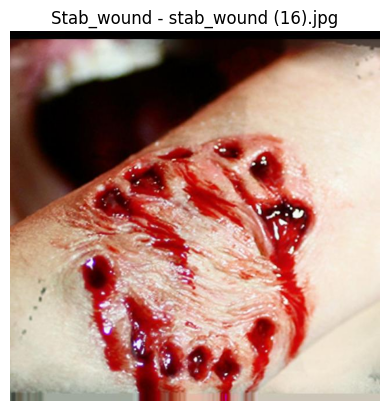

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import random

# Path to the dataset
dataset_path = "dataset/Wound_dataset"

# List all categories
categories = os.listdir(dataset_path)
print("Categories:", categories)

# Pick a random category
category = random.choice(categories)
category_path = os.path.join(dataset_path, category)

# Pick a random image in that category
image_file = random.choice(os.listdir(category_path))
image_path = os.path.join(category_path, image_file)

# Read and display
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"{category} - {image_file}")
plt.show()


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from google.colab import widgets, output
from ipywidgets import Dropdown, interact

# Path to dataset
dataset_path = "dataset/Wound_dataset"
categories = os.listdir(dataset_path)

# Function to show a random image from selected category
def show_image(category):
    category_path = os.path.join(dataset_path, category)
    image_file = os.listdir(category_path)[0]  # take first image
    image_path = os.path.join(category_path, image_file)

    img = cv2.imread(image_path)
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"{category} - {image_file}")
    plt.show()

# Dropdown widget to select category
interact(show_image, category=Dropdown(options=categories, description='Category:'))


interactive(children=(Dropdown(description='Category:', options=('Cut', 'Burns', 'Bruises', 'Abrasions', 'Ingr…

<function __main__.show_image(category)>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to dataset
dataset_path = "dataset/Wound_dataset"

# Image size
IMG_SIZE = (224, 224)  # suitable for transfer learning

# Create ImageDataGenerator for training
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% for validation
)

# Training data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation data
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 347 images belonging to 7 classes.
Found 84 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load MobileNetV2 base
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # freeze base

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5  # you can increase if you have more time
)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 780ms/step - accuracy: 0.1106 - loss: 2.4288 - val_accuracy: 0.2619 - val_loss: 1.8656
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 686ms/step - accuracy: 0.3766 - loss: 1.6393 - val_accuracy: 0.3690 - val_loss: 1.6644
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 793ms/step - accuracy: 0.4870 - loss: 1.4529 - val_accuracy: 0.4881 - val_loss: 1.5150
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 697ms/step - accuracy: 0.5784 - loss: 1.2169 - val_accuracy: 0.5238 - val_loss: 1.4092
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 686ms/step - accuracy: 0.6647 - loss: 1.1011 - val_accuracy: 0.5595 - val_loss: 1.3188


In [ ]:
import numpy as np

# Pick one image to test
test_img_path = "dataset/Wound_dataset/Abrasions/abrasions (1).jpg"
img = tf.keras.preprocessing.image.load_img(test_img_path, target_size=IMG_SIZE)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

pred = model.predict(img_array)
pred_class = train_data.class_indices
pred_label = list(pred_class.keys())[np.argmax(pred)]
print("Predicted Category:", pred_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Category: Abrasions


In [1]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Upload image
uploaded = files.upload()

for fn in uploaded.keys():
    # Display the uploaded image
    img = cv2.imread(fn)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()

    # Preprocess for model
    img_resized = image.load_img(fn, target_size=(224,224))
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    pred = model.predict(img_array)
    pred_class = train_data.class_indices
    pred_label = list(pred_class.keys())[np.argmax(pred)]
    print("Predicted Category:", pred_label)


Saving 7f48265c-f108-4832-a70d-33925eb28b36.zip to 7f48265c-f108-4832-a70d-33925eb28b36.zip


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [1]:
from google.colab import files
uploaded = files.upload()




Saving IMG474.jpg to IMG474.jpg


In [5]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2

for fn in uploaded.keys():
    # Read the uploaded image
    img = cv2.imread(fn)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()

    # Preprocess for model
    img_resized = image.load_img(fn, target_size=(224,224))
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict the class
    pred = model.predict(img_array)
    pred_class = train_data.class_indices
    pred_label = list(pred_class.keys())[np.argmax(pred)]
    print("Predicted Category:", pred_label)


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [7]:
import zipfile
import os

zip_path = "7f48265c-f108-4832-a70d-33925eb28b36.zip"  # your zip file
extract_to = "wound_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Files extracted to:", extract_to)


Files extracted to: wound_dataset


In [8]:
os.listdir(extract_to)


['Wound_dataset']

In [9]:
os.listdir(os.path.join(extract_to, "Wound_dataset", "Abrasions"))


['abrasions (68).jpg',
 'abrasions (25).jpg',
 'abrasions (23).jpg',
 'abrasions (4).jpg',
 'abrasions (55).jpg',
 'abrasions (69).jpg',
 'abrasions (33).jpg',
 'abrasions (3).jpg',
 'abrasions (49).jpg',
 'abrasions (21).jpg',
 'abrasions (62).jpg',
 'abrasions (27).jpg',
 'abrasions (79).jpg',
 'abrasions (83).jpg',
 'abrasions (84).jpg',
 'abrasions (8).jpg',
 'abrasions (39).jpg',
 'abrasions (78).jpg',
 'abrasions (12).jpg',
 'abrasions (26).jpg',
 'abrasions (66).jpg',
 'abrasions (36).jpg',
 'abrasions (9).jpg',
 'abrasions (17).jpg',
 'abrasions (58).jpg',
 'abrasions (60).jpg',
 'abrasions (46).jpg',
 'abrasions (71).jpg',
 'abrasions (16).jpg',
 'abrasions (72).jpg',
 'abrasions (43).jpg',
 'abrasions (76).jpg',
 'abrasions (51).jpg',
 'abrasions (30).jpg',
 'abrasions (41).jpg',
 'abrasions (82).jpg',
 'abrasions (63).jpg',
 'abrasions (56).jpg',
 'abrasions (7).jpg',
 'abrasions (44).jpg',
 'abrasions (6).jpg',
 'abrasions (77).jpg',
 'abrasions (59).jpg',
 'abrasions (29).

In [11]:
import os

# List the main folder
print(os.listdir("wound_dataset/Wound_dataset"))


['Cut', 'Burns', 'Bruises', 'Abrasions', 'Ingrown_nails', 'Stab_wound', 'Laceration']


In [12]:
category = "Abrasions"
folder_path = os.path.join("wound_dataset/Wound_dataset", category)
print(os.listdir(folder_path)[:5])  # show first 5 images


['abrasions (68).jpg', 'abrasions (25).jpg', 'abrasions (23).jpg', 'abrasions (4).jpg', 'abrasions (55).jpg']


In [15]:
test_image_path = os.path.join(folder_path, 'abrasions (68).jpg')
print("Path to test image:", test_image_path)


Path to test image: wound_dataset/Wound_dataset/Abrasions/abrasions (68).jpg


In [23]:
import os
os.listdir("wound_dataset/Wound_dataset")


['Cut',
 'Burns',
 'Bruises',
 'Abrasions',
 'Ingrown_nails',
 'Stab_wound',
 'Laceration']

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.8,1.2),
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='reflect',
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    'wound_dataset/Wound_dataset',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    'wound_dataset/Wound_dataset',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 347 images belonging to 7 classes.
Found 84 images belonging to 7 classes.


In [25]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(train_data.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
model.fit(train_data, validation_data=val_data, epochs=5)



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.3127 - loss: 1.8252 - val_accuracy: 0.4762 - val_loss: 1.3498
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.6064 - loss: 1.0423 - val_accuracy: 0.5833 - val_loss: 1.1969
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.7313 - loss: 0.7115 - val_accuracy: 0.6429 - val_loss: 1.0588
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8244 - loss: 0.5492 - val_accuracy: 0.7262 - val_loss: 0.9611
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8854 - loss: 0.4293 - val_accuracy: 0.7024 - val_loss: 1.0334


In [27]:
model.save("wound_model.h5")
print("Model saved successfully!")



Model saved successfully!


In [30]:
import os

# Top-level folders
print("Main folder:", os.listdir("wound_dataset/Wound_dataset"))


Main folder: ['Cut', 'Burns', 'Bruises', 'Abrasions', 'Ingrown_nails', 'Stab_wound', 'Laceration']


In [31]:
print(os.listdir("wound_dataset/Wound_dataset/Abrasions")[:10])



['abrasions (68).jpg', 'abrasions (25).jpg', 'abrasions (23).jpg', 'abrasions (4).jpg', 'abrasions (55).jpg', 'abrasions (69).jpg', 'abrasions (33).jpg', 'abrasions (3).jpg', 'abrasions (49).jpg', 'abrasions (21).jpg']


In [33]:
test_image_path = "wound_dataset/Wound_dataset/Abrasions/abrasions (25).jpg"
print("Path to test image:", test_image_path)


Path to test image: wound_dataset/Wound_dataset/Abrasions/abrasions (25).jpg


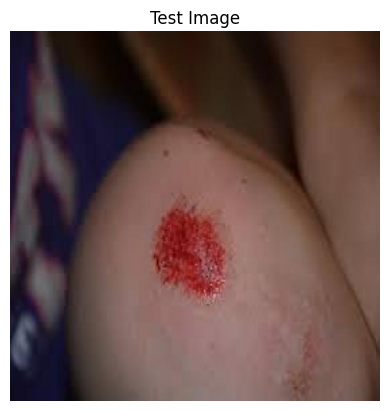

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Category: Abrasions


In [34]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open(test_image_path)
plt.imshow(img)
plt.axis('off')
plt.title("Test Image")
plt.show()

img_resized = img.resize((224,224))
img_array = image.img_to_array(img_resized)
img_array = np.expand_dims(img_array, axis=0) / 255.0

pred = model.predict(img_array)
pred_class = train_data.class_indices
pred_label = list(pred_class.keys())[np.argmax(pred)]
print("Predicted Category:", pred_label)


In [35]:
model.save("wound_model.keras")


In [36]:
!ls -lh


total 37M
-rw-r--r-- 1 root root  14M Sep 27 11:16 7f48265c-f108-4832-a70d-33925eb28b36.zip
-rw-r--r-- 1 root root  82K Sep 27 11:10 IMG474.jpg
drwxr-xr-x 1 root root 4.0K Sep 25 13:37 sample_data
drwxr-xr-x 3 root root 4.0K Sep 27 11:34 wound_dataset
-rw-r--r-- 1 root root  12M Sep 27 12:38 wound_model.h5
-rw-r--r-- 1 root root  12M Sep 27 12:47 wound_model.keras


In [37]:
from google.colab import files
files.download("wound_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>